In [5]:
"""\
# Copyright (C) 2025 Jesús Bautista Villar <jesbauti20@gmail.com>
- Testing a proportional 3D heading control algorithm -
"""
!python -V || python3 -V

Python 3.10.12


In [1]:
import numpy as np
import os
import sys

# Graphic tools
import matplotlib

matplotlib.rc('font', **{'size' : 14})
matplotlib.rc('xtick', labelsize=12)
matplotlib.rc('ytick', labelsize=12)

import matplotlib.pyplot as plt

# --------------------------------------------------------------------------------------
# Source Seeking 3D Tools

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from ssl_simulator import create_dir
from ssl_simulator.math import uniform_distrib
from ssl_simulator.visualization import set_paper_parameters
set_paper_parameters(fontsize=15)

from sourceseeking_3d.utils.tools_math import *
from sourceseeking_3d.utils.tools_plot import *

from simulations.sim_ifac_thm import sim_ifac_thm
from simulations.sim_ifac_ss import sim_ifac_ss

# --------------------------------------------------------------------------------------

SEED = 2030

# Create the output directory
OUTPUT_FOLDER = os.path.join("..","output")
create_dir(OUTPUT_FOLDER)

The directory '../output' already exists!


## IFAC - Theorem numerical verification

Initial conditions summary:
D0 = 3.8662576069508443, lambda_min_0 = 0.07060939462759655
epsilon_max: (1) = 0.009120733022282224, (2) = 0.029714598792828006
k1 = 0.5553603672697958, k2 = 413.3342325773319


100%|██████████| 2001/2001 [00:03<00:00, 523.59it/s]


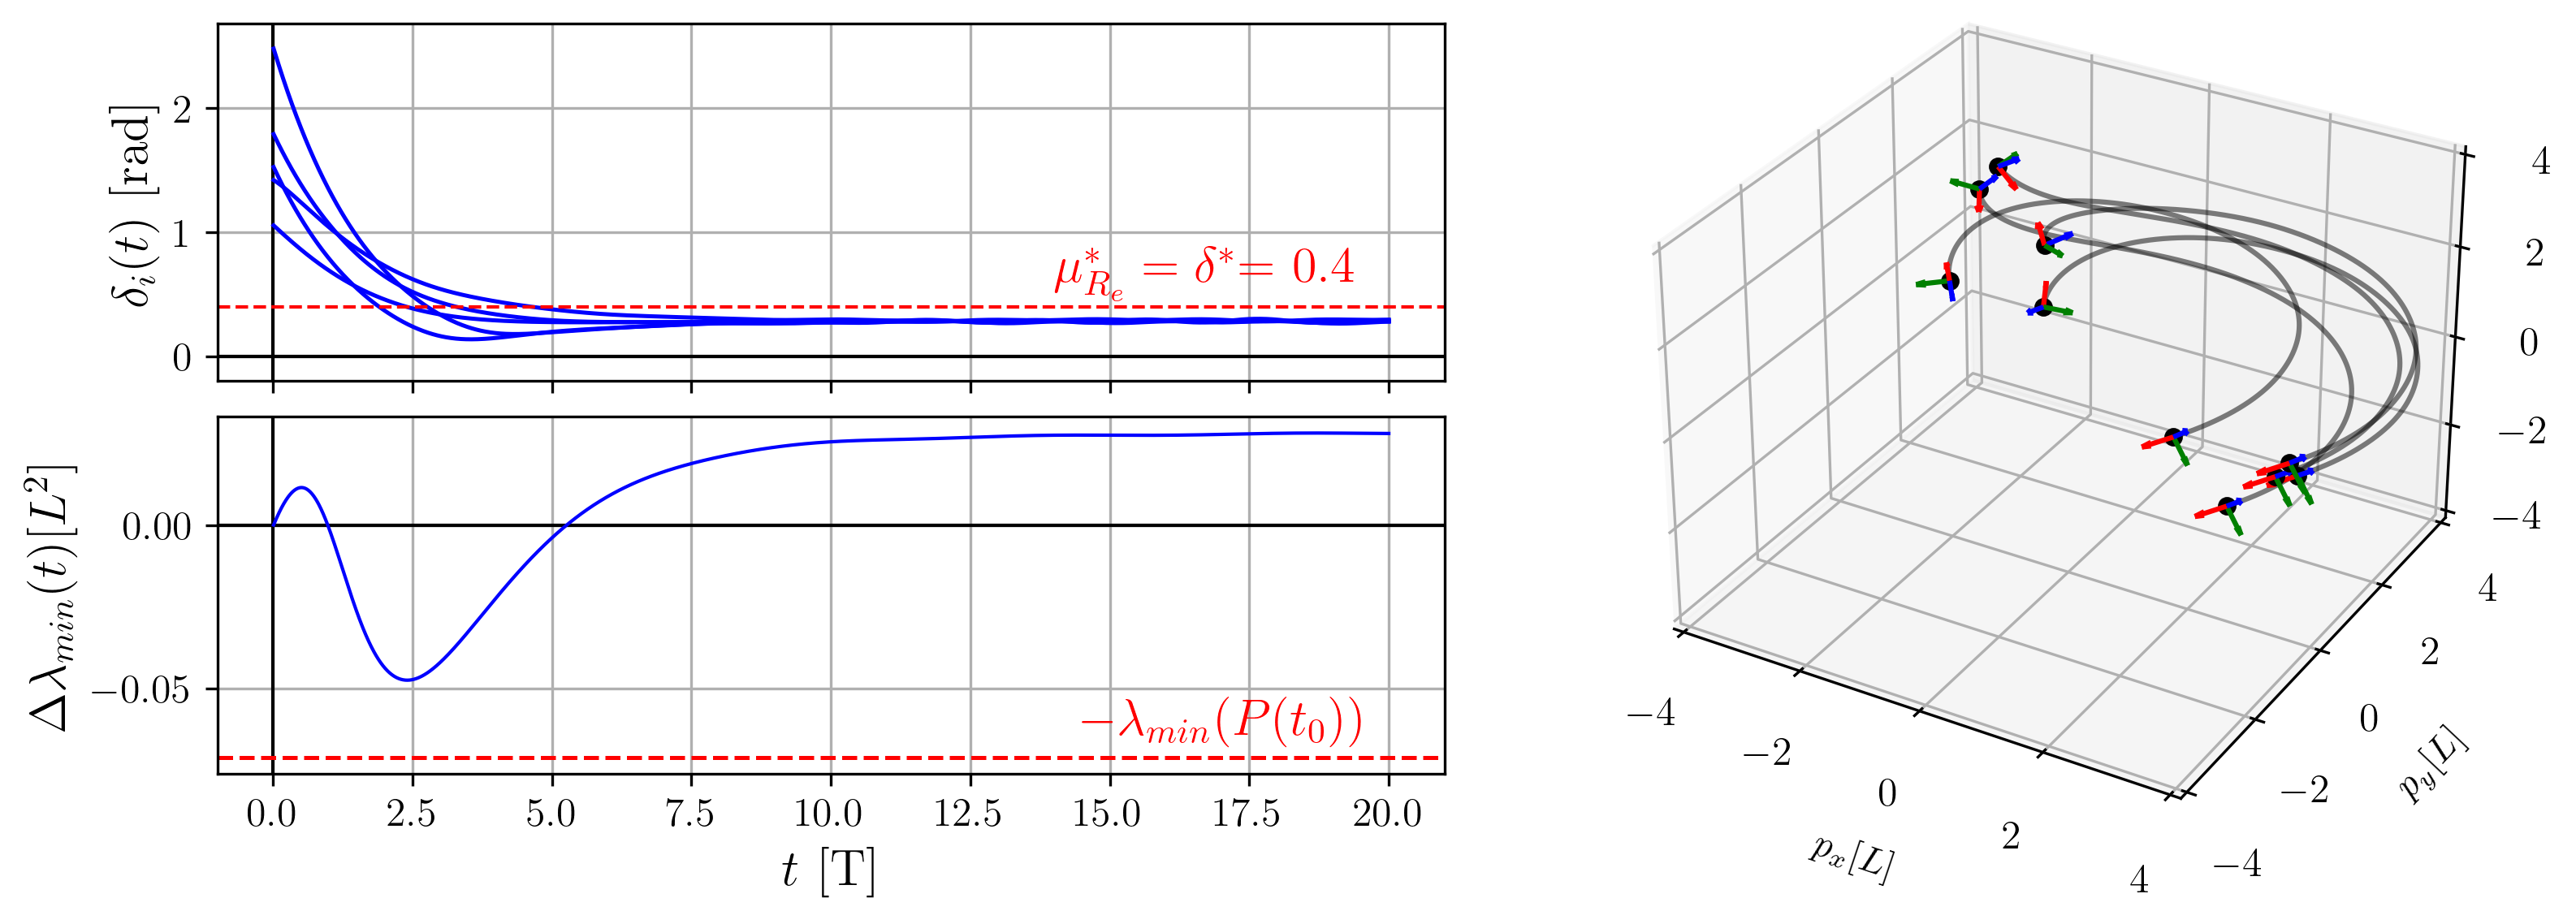

In [2]:
P0 = uniform_distrib(5, [1,1,2], [-2,1,1], seed=SEED)

# Initialise the simulation frame and launch the numerical simulation
sim_frame = sim_ifac_thm(
    p0 = P0,
    s  = 0.6,
    md = np.array([1,1,0])/np.sqrt(2),
    omega_s = -np.pi/20, 
    omega_k = np.pi/2, 
    mu_re_star = 0.4,
    tf = 20, dt=0.01,
    seed = SEED,
    fb_control = True, arr_len = 0.5
)

sim_frame.numerical_simulation()

# Plot the summary (initial + final state)
sim_frame.plot_article_figure(lims=[-4,4], output_folder=OUTPUT_FOLDER)

100%|██████████| 301/301 [00:00<00:00, 523.87it/s]


Animation parameters:  {'fps': 15, 'tf': 20, 'frames': 299}


100%|█████████▉| 298/299 [00:19<00:00, 14.79it/s]

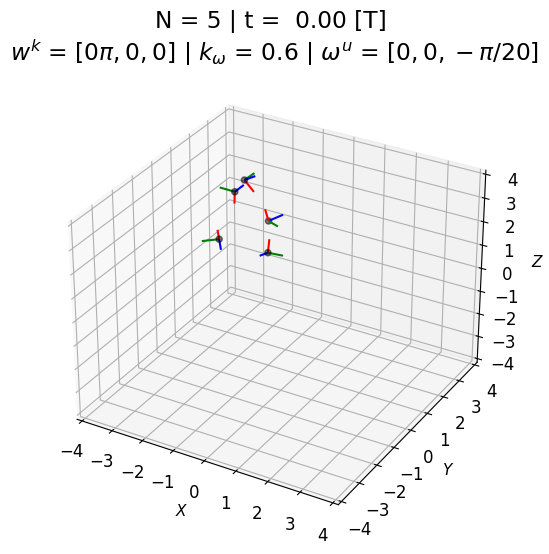

100%|█████████▉| 298/299 [00:33<00:00, 14.79it/s]

In [3]:
fps = 15

sim_frame.dt = 1/fps
sim_frame.numerical_simulation()
sim_frame.generate_animation(OUTPUT_FOLDER, gif=True, fps=fps, lims=[-4,4])

## IFAC - Source seeking in 3D

100%|██████████| 1501/1501 [00:04<00:00, 312.22it/s]


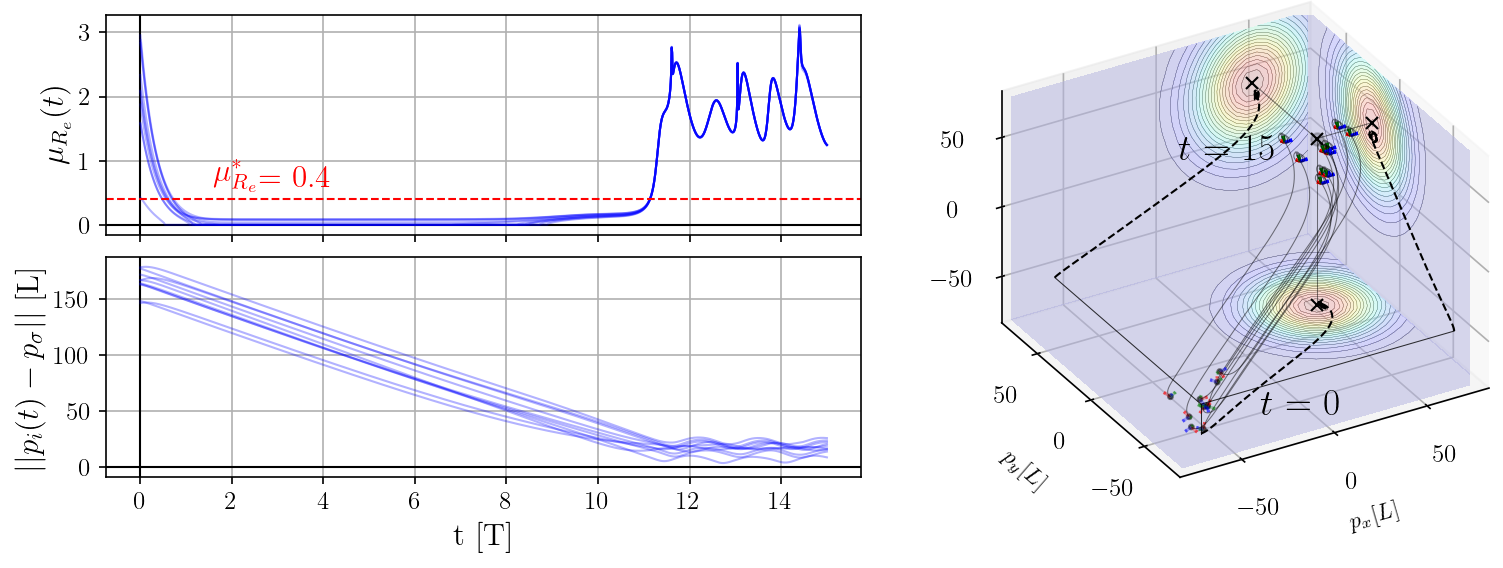

In [3]:
# Initialise the simulation frame and launch the numerical simulation
sim_frame = sim_ifac_ss(n_agents=10, tf=15, dt=0.01, omega_k=np.pi, omega_s=np.pi/4, mu_re_star=0.4, seed=SEED)
sim_frame.numerical_simulation()

# Plot the summary (initial + final state)
sim_frame.plot_article_figure(OUTPUT_FOLDER, dpi=150)

100%|██████████| 151/151 [00:00<00:00, 416.63it/s]


Animation parameters:  {'fps': 10, 'tf': 15, 'frames': 149}


100%|██████████| 149/149 [00:32<00:00,  7.29it/s]

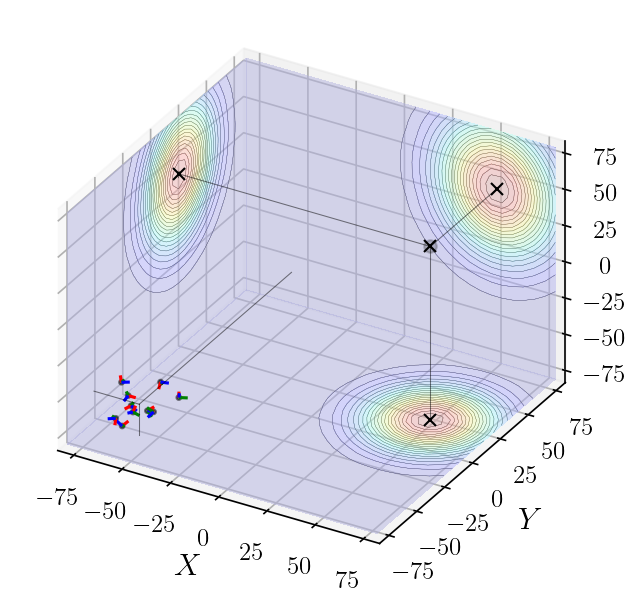

In [4]:
# Generate an animation of the whole simulation
fps = 10

sim_frame.dt = 1/fps
sim_frame.numerical_simulation()
sim_frame.generate_animation(OUTPUT_FOLDER, dpi=150, gif=True, fps=fps)